###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 parts of this notebook are from [this Jupyter notebook](https://nbviewer.jupyter.org/github/krischer/seismo_live/blob/master/notebooks/Computational%20Seismology/The%20Finite-Difference%20Method/fd_first_derivative.ipynb) by Kristina Garina and Heiner Igel [@heinerigel](https://github.com/heinerigel) which is a supplemenatry material to the book [Computational Seismology: A Practical Introduction](http://www.computational-seismology.org/),  additional modifications by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Finite-difference approximations

In the last lecture we covered different approaches to discretize continous media.
Now, we only have to understand how to approximate (partial) derivatives by finite-differences.

## Approximation of first derivatives

The approximation of first derivatives using finite-differences is quite straightforward. Imagine that we have some time-dependent function $f(t)$, for which we want to calculate the first derivatives $\frac{\partial f(t)}{\partial t}$:

<img src="images/gauss_disc_final.png" width="95%">

First, we discretize $f(t)$ at discrete times

\begin{equation}
t = i * dt, \nonumber
\end{equation}

where $dt$ denotes a constant temporal sample interval. By definition, the first derivative of $f(t)$ with respect to $t$ is:

\begin{equation}
\frac{\partial f(t)}{\partial t} = \lim_{dt \rightarrow 0} \frac{f(t+dt)-f(t)}{dt}, \nonumber
\end{equation}

In the **finite-difference (FD) approximation**, we neglect the limit $dt \rightarrow 0$:

\begin{equation}
\frac{\partial f(t)}{\partial t} \approx \frac{f(t+dt)-f(t)}{dt} \nonumber
\end{equation}

Because $dt$ remains finite, this approximation is called finite-differences. Furthermore, we can distinguish between different finite difference operators, depending on the points involved in the approximation. The above example is a **forward FD operator**

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr)^+ \approx \frac{f(t+dt)-f(t)}{dt}. \nonumber
\end{equation}

Alternatively, we can also define a **backward FD operator**

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr)^- \approx \frac{f(t)-f(t-dt)}{dt}. \nonumber
\end{equation}

By taking the arithmetic average of the forward and backward operator

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr) \approx \frac{\left(\frac{\partial f(t)}{\partial t}\right)^- + \left(\frac{\partial f(t)}{\partial t}\right)^+}{2},\nonumber
\end{equation}

we get the **central FD operator**

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr) \approx \frac{f(t+dt)-f(t-dt)}{2dt}. \nonumber
\end{equation}

##### Exercise

Prove for the quadratic function

\begin{equation} 
g(t) = b t^2 \nonumber
\end{equation} 

where $b$ is a constant time-independent parameter, that in the limit $dt \rightarrow 0$, the forward, backward and central FD operators lead to the correct temporal first derivative:

\begin{equation} 
\frac{\partial g(t)}{\partial t} = 2 b t \nonumber
\end{equation} 

In [2]:
# Import Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import rcParams

As an example, let's try to calculate the first temporal derivative of the Gaussian function

\begin{equation} 
f(t)=\dfrac{1}{\sqrt{2 \pi a}}e^{-\dfrac{(t-t_0)^2}{2a}},\nonumber
\end{equation} 

where $a$ denotes the half-width of the Gaussian and $t_0$ a time-shift of the maximum.

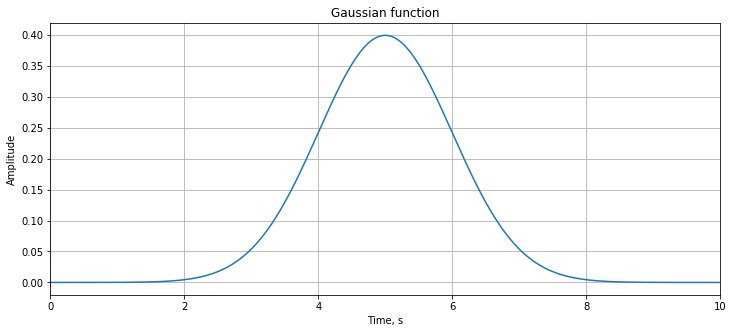

In [3]:
# Define figure size
rcParams['figure.figsize'] = 12, 5

# Initial parameters
tmax=10.0                     # maximum time
nt=1000                       # number of time sample
a=1                           # half-width      
dt=tmax/nt                    # defining dt
t0 = tmax/2                   # defining time shift t0

time=np.linspace(0,tmax,nt)   # defining time

# Define gaussian function          
f=(1./np.sqrt(2*np.pi*a))*np.exp(-(((time-t0)**2)/(2*a)))
    
# Plotting of gaussian
plt.plot(time, f)
plt.title('Gaussian function')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.xlim((0, tmax))
plt.grid()
plt.show()

Next, we calculate the numerical derivative using finite-differences with the forward operator:

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr)^+ \approx \frac{f(t+dt)-f(t)}{dt}. \nonumber
\end{equation}

backward operator:

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr)^- \approx \frac{f(t)-f(t-dt)}{dt}, \nonumber
\end{equation}

and central operator:

\begin{equation}
\biggl(\frac{\partial f(t)}{\partial t}\biggr) \approx \frac{f(t+dt)-f(t-dt)}{2dt}. \nonumber
\end{equation}

To test the accuarcy of these approaches, we compare them with the analytical derivative:

\begin{equation} 
\frac{\partial f(t)}{\partial t}=-\dfrac{t-t_0}{a}\dfrac{1}{\sqrt{2\pi a}}e^{-\dfrac{(t-t_0)^2}{2a}} \nonumber
\end{equation} 

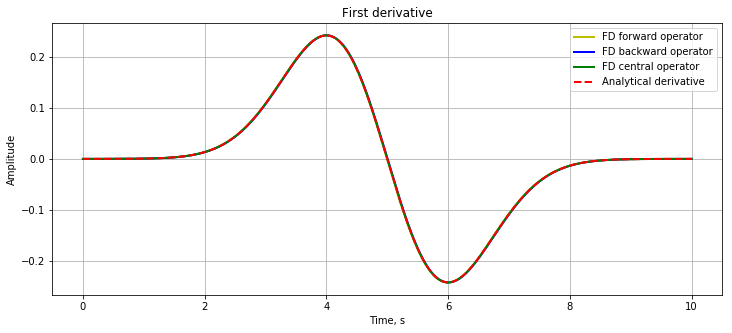

In [4]:
# First derivative of Gaussian function

# Initiation of numerical and analytical derivatives 
nder_for=np.zeros(nt)      # forward FD operator
nder_back=np.zeros(nt)     # backward FD operator
nder_cent=np.zeros(nt)     # central FD operator
ader=np.zeros(nt)          # analytical derivative

# Numerical FD derivative of the Gaussian function
for it in range (1, nt-1):
    
    nder_for[it]=(f[it+1]-f[it])/dt        # forward operator
    nder_back[it]=(f[it]-f[it-1])/dt       # backward operator
    nder_cent[it]=(f[it+1]-f[it-1])/(2*dt) # central operator

# Analytical derivative of the Gaussian function
ader=(-(time-t0)/a)*(1/np.sqrt(2*np.pi*a))*np.exp(-(time-t0)**2/(2*a))     

# Plot of the first derivative and analytical derivative
plt.plot(time, nder_for,label="FD forward operator", lw=2, color="y")
plt.plot(time, nder_back,label="FD backward operator", lw=2, color="b")
plt.plot(time, nder_cent,label="FD central operator", lw=2, color="g")
plt.plot(time, ader, label="Analytical derivative", ls="--",lw=2, color="red")
plt.title('First derivative')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

The approximation of the first derivative of the Gaussian by all three FD operators seem to be very accurate. How large are actually the errors?

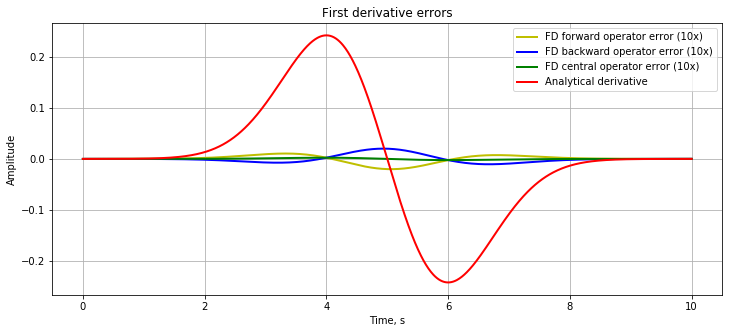

In [5]:
# Erros of the FD approximation

# Plot of the errors of the first derivative FD approximations
plt.plot(time, 10*(nder_for-ader),label="FD forward operator error (10x)", lw=2, color="y")
plt.plot(time, 10*(nder_back-ader),label="FD backward operator error (10x)", lw=2, color="b")
plt.plot(time, 10*(nder_cent-ader),label="FD central operator error (10x)", lw=2, color="g")
plt.plot(time, ader, label="Analytical derivative",lw=2, color="red")
plt.title('First derivative errors')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

The errors for all three operators are actually quite small, so we have to amplify them by a factor 10. Larger errors occur in areas with significant slope. Notice also, that the central operator has the smallest error. You wonder why? We will see in a later lecture.

## FD approximation of the 2nd derivative

We derived FD approximations for the 1st derivative. However, to approximate the acoustic wave equation, we also need to know how to approximate a 2nd derivative. 
To achieve this, we calculate the **Taylor expansion** of $f(t+dt)$ up to the second order term:

\begin{equation}
f(t+dt) \approx f(t) + \frac{\partial f(t)}{\partial t} dt + \frac{1}{2}\frac{\partial^2 f(t)}{\partial t^2} dt^2 + \mathcal{O}(dt^3)\nonumber
\end{equation} 

We do the same for $f(t-dt)$:

\begin{equation}
f(t-dt) \approx f(t) - \frac{\partial f(t)}{\partial t} dt + \frac{1}{2}\frac{\partial^2 f(t)}{\partial t^2} dt^2 + \mathcal{O}(dt^3)\nonumber
\end{equation} 

Adding the approximations $f(t+dt)$ and $f(t-dt)$ leads to 

\begin{equation}
f(t-dt) + f(t+dt) \approx 2 f(t) + \frac{\partial^2 f(t)}{\partial t^2} dt^2\nonumber
\end{equation} 

Finally, we can rearrange to $\frac{\partial^2 f(t)}{\partial t^2}$ and get the following **FD approximation for the 2nd derivative**

\begin{equation}
\frac{\partial^2 f(t)}{\partial t^2} \approx \frac{f(t-dt) + f(t+dt) - 2 f(t)}{dt^2}\nonumber
\end{equation} 

##### Excercise

* Calculate the 2nd derivative $\frac{\partial^2 f(t)}{\partial t^2}$ of the Gaussian 
\begin{equation} 
f(t)=\dfrac{1}{\sqrt{2 \pi a}}e^{-\dfrac{(t-t_0)^2}{2a}},\nonumber
\end{equation}
analytically. In case you are too lazy to compute the 2nd derivative by hand, you can also type **Second derivative of (1/sqrt(2*pi*a))*exp(-(t-t0)^2/(2*a)) with respect to t** in [Wolfram Alpha](https://www.wolframalpha.com/)
* Compute and compare the numerical with the analytical 2nd derivative of the Gaussian and the errors between both solutions

In [ ]:
# 2nd derivative of Gaussian function

# Initiation of numerical and analytical derivatives 
nder2=np.zeros(nt)      # 2nd derivative FD operator
ader2=np.zeros(nt)      # analytical 2nd derivative

# Numerical FD derivative of the Gaussian function
for it in range (1, nt-1):
    
    # ADD YOUR 2ND DERIVATIVE OF THE GAUSSIAN HERE!
    # nder2[it]=        # 2nd derivative FD operator
    
# ADD ANALYTICAL 2ND DERIVATIVE OF THE GAUSSIAN HERE!
# ader2=

# Plot of the numerical and analytical second derivative of the Gaussian
#plt.plot(time, nder2,label="FD operator", lw=2, color="y")
#plt.plot(time, ader2, label="Analytical 2nd derivative", ls="--",lw=2, color="red")
plt.title('2nd derivative Gaussian')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Error of the 2nd derivative FD approximation

# Plot of the second derivative FD approximation error
#plt.plot(time, nder2-ader2,label="FD operator error", lw=2, color="violet")
#plt.plot(time, ader2,label="Analytical 2nd derivative", lw=2, color="red")
plt.title('2nd derivative errors')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## We learned:

* Approximation of numerical first derivative of a time dependent function by forward, backward and central FD operators
* Comparison with analytical solution to estimate the numerical errors 
* Approximation of 2nd derivative of a time dependent function using Taylor series expansion